In [1]:
from pynq import Overlay
import os
import sys
import numpy as np

HOP_DIR=os.path.abspath("../")
sys.path.insert(0, HOP_DIR)
import pushpush
import newstub

#OVERLAY_DIR= os.path.join(HOP_DIR, 'overlays', 'add_reduce')
OVERLAY_DIR= os.path.join(HOP_DIR, 'overlays', 'add_reduce')

print(OVERLAY_DIR)

/home/xilinx/hop/overlays/add_reduce


In [2]:
ol = Overlay(os.path.join(OVERLAY_DIR, "add_reduce.bit"))

In [3]:
ol.ip_dict

{'HoP_add_reduce_0': {'type': 'HoP:HoP:HoP_add_reduce:0.1',
  'mem_id': 's_axi_cep',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {},
  'parameters': {'C_S_AXI_CEP_ADDR_WIDTH': '7',
   'C_S_AXI_CEP_DATA_WIDTH': '32',
   'C_M_AXI_MST_ID_WIDTH': '1',
   'C_M_AXI_MST_ADDR_WIDTH': '64',
   'C_M_AXI_MST_DATA_WIDTH': '32',
   'C_M_AXI_MST_AWUSER_WIDTH': '1',
   'C_M_AXI_MST_ARUSER_WIDTH': '1',
   'C_M_AXI_MST_WUSER_WIDTH': '1',
   'C_M_AXI_MST_RUSER_WIDTH': '1',
   'C_M_AXI_MST_BUSER_WIDTH': '1',
   'C_M_AXI_MST_USER_VALUE': '0x00000000',
   'C_M_AXI_MST_PROT_VALUE': '"000"',
   'C_M_AXI_MST_CACHE_VALUE': '"0011"',
   'C_M_AXI_MST_ENABLE_ID_PORTS': 'true',
   'C_M_AXI_MST_ENABLE_USER_PORTS': 'false',
   'Component_Name': 'pynq_stream_HoP_add_reduce_0_0',
   'clk_period': '10',
   'machine': '64',
   'combinational': '0',
   'latency': 'undef',
   'II': 'x',
   'EDK_IPTYPE': 'PERIPHERAL',
   'C_S_AXI_CEP_BASEADDR': '0x40000000',
   'C_S_AXI_CEP_HIGHADDR': '0x4000FFFF',
   'ADDR_WIDT

In [4]:
import importlib as il

il.reload(pushpush)
pushpush.Context.reloadModules()

if 'context' in locals():
    del context

In [5]:
context = pushpush.Context(ol)

In [6]:
add_reduce = context.functions['hardware']['add_reduce']
add = context.functions['hardware']['add']

In [9]:
l = [1] * 262144
print(f'{len(l)} == {add_reduce(l)}')

262144 == 262144


In [124]:
add_reduce.printRegspacePretty()

sig:         10102
status:      1
call_count:  1515716608
cep_a:       0
cep_b:       0
val_a:       0
val_b:       0
rep_addr:    0


## Performance Comparison

In [10]:
def reduce_py(arr):
    acc = 0
    for n in arr:
        acc += n
    return acc

In [11]:
import functools 
def reduce_fn(arr):
    return functools.reduce(lambda a,b: a + b, arr)

In [12]:
def reduce_np(arr:'np.ndarray'):
    return np.add.reduce(arr)

In [138]:
import time
import random
def run_test_suite(tests, l):
    print('       00%', end='')
    hw_start = time.time()
    for _ in range(tests):
        add_reduce(l)
    hw_end = time.time()
    
    print('\r       25%', end='')

    py_start = time.time()
    for _ in range(tests):
        reduce_py(l)
    py_end = time.time()

    print('\r       50%', end='')

    fn_start = time.time()
    for _ in range(tests):
        reduce_fn(l)
    fn_end = time.time()

    print('\r       75%', end='')

    np_start = time.time()
    for i in range(tests):
        reduce_np(l)
    np_end = time.time()

    print('\r      100%')
    
    hw_time = hw_end - hw_start
    py_time = py_end - py_start
    fn_time = fn_end - fn_start
    np_time = np_end - np_start

    return (hw_time, py_time, fn_time, np_time)

In [139]:
data_size = 262144 # * 32b == 1 MiB

Ns = [1, 10, 100]
R = 10
Ls = [np.full(shape=(data_size,), fill_value=1, dtype=np.uint32),
         list(np.full(shape=(data_size,), fill_value=1, dtype=np.uint32)),
         list(np.full(shape=(data_size,), fill_value=1, dtype=int)),
         [random.randint(0, pow(2,32)) for _ in range(data_size) ]]
results = np.ndarray(shape=(len(lists), len(Ns), R, 4))

In [152]:
for Ln in range(len(Ls)):
    print(f'L: {Ln}')
    for r in range(R):
        print(f'  R: {r}')
        for Nn in range(len(Ns)):
            print(f'    N: {Ns[Nn]}')
            (h, p, f, n) = run_test_suite(Ns[Nn], Ls[Ln])
            results[Ln, Nn, r, 0] = h
            results[Ln, Nn, r, 1] = p
            results[Ln, Nn, r, 2] = f
            results[Ln, Nn, r, 3] = n

L: 0
  R: 0
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 1
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 2
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 3
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 4
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 5
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 6
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 7
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 8
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 9
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
L: 1
  R: 0
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 1
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 2
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 3
    N: 1
      100%
    N: 10
      100%
    N: 100
      100%
  R: 4
   

In [153]:
with open("results.csv", 'wb') as rf:
    np.save(rf, results)

In [ ]:
results = np.load('results.csv')

In [154]:
# (List, Test size, Run number, Result)
results.shape

(4, 3, 10, 4)

In [117]:

print(np.mean(results[0, 1, :, testDict['Hardware']]))
print(np.mean(results[0, 1, :, testDict['Numpy']]))

0.2344290494918823
4.494500994682312


In [ ]:
print(f'Python:      {py_time}')
print(f'Functional:  {fn_time}')
print(f'Numpy:       {np_time}')
print(f'Hardware:    {hw_time}')
print(f'PY/HW Speed: {(py_time / hw_time) * 100:.2f}%')
print(f'FN/HW Speed: {(fn_time / hw_time) * 100:.2f}%')
print(f'NP/HW Speed: {(np_time / hw_time) * 100:.2f}%')

In [213]:
import matplotlib.pyplot as plt
testNames = ['Hardware', 'Python', 'Functools', 'Numpy']
testDict = {'Hardware': 0, 'Python': 1, 'Functools': 2, 'Numpy': 3}
listDict = {0: 'ndarray', 1: 'np_cast_uint32', 2: 'np_cast_int', 3: 'list'}
testsDict = {0: '1t', 1: '10t', 2: '100t'}

for sel in range(4):
    fig, ax = plt.subplots()
    ax.set_ylabel('Execution time - seconds (Less is better)')
      
    for i in [0, 3]:
        ax.violinplot(results[sel, 2, :, :])
        
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Hardware', 'Numpy'])
    fig.set_figwidth(6)
    fig.set_figheight(8)
    plt.style.use('fivethirtyeight')
    file = f'plots/{listDict[sel[0]]}-{testsDict[sel[1]]}-numpy_hw'
    plt.savefig(file, bbox_inches='tight')
    plt.show

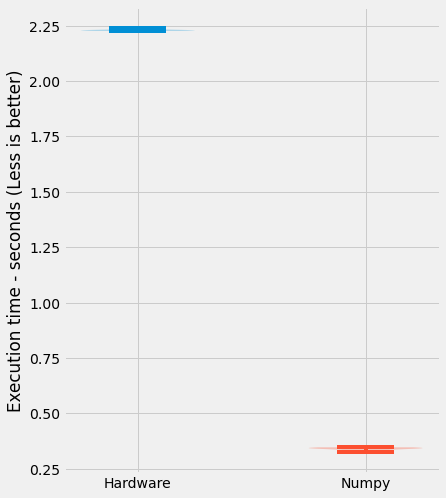

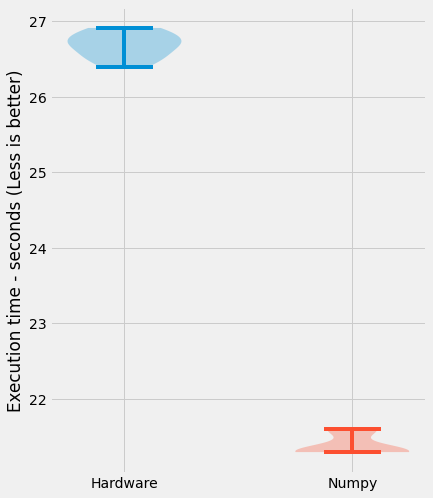

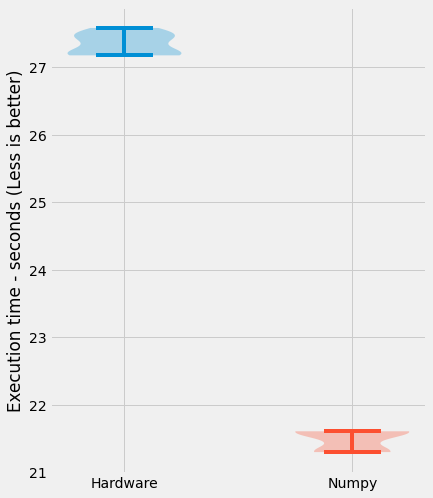

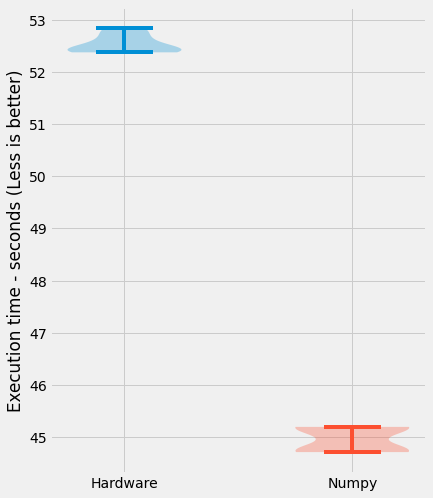

In [274]:
import matplotlib.pyplot as plt
testNames = ['Hardware', 'Python', 'Functools', 'Numpy']
testDict = {'Hardware': 0, 'Python': 1, 'Functools': 2, 'Numpy': 3}
listDict = {0: 'ndarray', 1: 'np_cast_uint32', 2: 'np_cast_int', 3: 'list'}
testsDict = {0: '1t', 1: '10t', 2: '100t'}

for sel in range(4):
    fig, ax = plt.subplots()
    ax.set_ylabel('Execution time - seconds (Less is better)')
      
    ax.violinplot(results[sel, 2, :, 0], positions=[1])
    ax.violinplot(results[sel, 2, :, 3], positions=[2])
        
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Hardware', 'Numpy'])
    fig.set_figwidth(6)
    fig.set_figheight(8)
    plt.style.use('fivethirtyeight')
    file = f'plots/{listDict[sel]}-100t-numpy_hw'
    plt.savefig(file, bbox_inches='tight')
    plt.show()
    plt.close()

In [280]:
f'{(np.average(results[0, 2, :, 3]) / np.average(results[0, 2, :, 0])) * 100 :.2f}%'

'15.16%'

In [252]:
m = 0
for i in range(4):
    j = np.argmax(np.std(results[i, 2, :, :], axis=0))
    m = max(np.std(results[i, 2, :, j]) / np.mean(results[i, 2, :, j]), m)
print(f'{(m * 100):.2f}%')

1.81%
